In [1]:
import matplotlib.pyplot as plt

from midichlorians.models.encoders.force_encoder_3 import EquivForceEncoder

import math
import numpy as np
import numpy.random as npr

import torch
import torch.nn as nn
import escnn.nn as enn

/home/colin/.local/share/virtualenvs/midichlorians-nLk5PVzm/lib/python3.8/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
encoder = EquivForceEncoder()
pool = enn.GroupPooling(encoder.out_type)
fc = nn.Linear(64, 1)

/home/colin/.local/share/virtualenvs/midichlorians-nLk5PVzm/lib/python3.8/site-packages/torch/functional.py:504: UserWarning: torch.meshgrid: in an upcoming release, it will be required to pass the indexing argument. (Triggered internally at ../aten/src/ATen/native/TensorShape.cpp:3190.)
  return _VF.meshgrid(tensors, **kwargs)  # type: ignore[attr-defined]


In [3]:
force = torch.randn(1,64,6)

In [4]:
def rotateForce(f, theta):
    R = np.array([
        [np.cos(theta), -np.sin(theta)],
        [np.sin(theta), np.cos(theta)]
    ])
    
    rot_fxy = (R @ f[:,:2].T).T
    rot_mxy = (R @ f[:,3:5].T).T
    
    return np.hstack([rot_fxy, f[:,2].reshape(64,1), rot_mxy, f[:,5].reshape(64,1)])

In [5]:
rot_force = rotateForce(force.numpy()[0], np.radians(90))

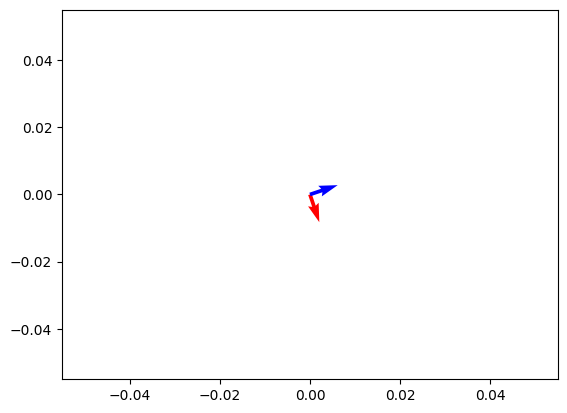

In [6]:
i = 0
V = np.array([[force[0,i,0], force[0,i,1]], [rot_force[i,0], rot_force[i,1]]])
origin = np.array([[0, 0],[0, 0]])

plt.quiver(*origin, V[:,0], V[:,1], color=['r','b'], scale=21)
plt.show()

In [7]:
with torch.no_grad():
    x = fc(pool(encoder(force)).tensor.view(1,64))
print(x)

tensor([[-2.6809]])


In [8]:
force = torch.randn(1,64,6)
for r in range(8):
    rot_force = rotateForce(force.numpy()[0], np.radians(r*45))
    rot_force = torch.tensor(rot_force).view(1,64,6).float()
    
    with torch.no_grad():
        x = fc(pool(encoder(rot_force)).tensor.view(1,64))
    print('rot: {} | out: {:.3f}'.format(r*45, x.item()))

rot: 0 | out: -2.442
rot: 45 | out: -2.437
rot: 90 | out: -2.382
rot: 135 | out: -2.440
rot: 180 | out: -2.463
rot: 225 | out: -2.533
rot: 270 | out: -2.627
rot: 315 | out: -2.543
